# Multisample - Fe-Mg equilibrium in ol-hosted MIs
- This notebook shows how to assess Fe-Mg equilibrium between olivines and melt inclusions, and between melt inclusions and co-erupted matrix glasses to let you assess Fe-Mg diffusion and post-entrapment crystallization
- In this example, we have multiple samples in the spreadsheet, so first subsample out the rows we want based on sample name. You will  have to change the sample names to reflect whatever column you use for this. Else, see single sample if you only have 1 sample in your spreadsheet
- You can download the spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Melt_Inclusion_FeMg_Equilibrium/2018_MIs_Glasses.xlsx
- These plots are really for matrix glass data - if its whole-rock, your Mg-Fe equilibrium could be affected by olivine addition/subtraction, and you will need to consider this

In [1]:
## Install Thermobar if you haven't already (remove # and press run)

# !pip install Thermobar

In [2]:
# Loading various python things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Loading a dataset
- This dataset is from Wieser et al. (2021) - https://doi.org/10.1029/2020GC009364
- It shows olivine-hosted melt inclusions from Fissure 8, which have undergone extensive and variable amonuts of PEC.
- We load in measured melt inclusion compositions (e.g. before PEC correction), and host olivines, as well as the composition of the co-erupted matrix glass
- You can download the spreadsheet here - https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Melt_Inclusion_FeMg_Equilibrium/2018_MIs_Glasses.xlsx

## Load in the matrix glasses

In [3]:
# We dont have to add _Liq as its all liquids, 
# just specify the _Liq in the import
MG_input=pt.import_excel('2018_MIs_Glasses.xlsx',
                         sheet_name='Matrix_Glasses', suffix="_Liq")
MG_all=MG_input['my_input'] ## All columns
MG_Liqs=MG_input['Liqs'] ## Just Liquid columns
MG_Liqs.head()

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,50.6243,2.8773,13.0360,11.8288,0.1830,5.8471,10.2471,2.5120,0.5234,0.0,0.2689,0.0,0.0,0.0,0.0,0.0,0
1,50.0975,2.8840,12.8885,11.2897,0.1769,5.8521,9.9658,2.4681,0.5305,0.0,0.2652,0.0,0.0,0.0,0.0,0.0,1
2,50.1517,2.5827,13.0277,11.2420,0.2141,6.6763,10.6820,2.2884,0.4462,0.0,0.2068,0.0,0.0,0.0,0.0,0.0,2
3,50.2523,2.5686,13.1034,10.9155,0.1948,6.4934,10.7276,2.3660,0.4822,0.0,0.2329,0.0,0.0,0.0,0.0,0.0,3
4,51.1145,2.6104,13.2432,11.1522,0.1738,6.5764,10.6298,2.4155,0.4704,0.0,0.2393,0.0,0.0,0.0,0.0,0.0,4


## Load in the melt inclusion data and the olivines
- As they are in the same sheet, we have to make sure we have _Liq after the melt inclusion oxide, and _Ol after the olivine

In [4]:
MIs_in=pt.import_excel('2018_MIs_Glasses.xlsx',
                         sheet_name='MIs_Ols')
MIs_Ol=MIs_in['Ols']
MIs_Liq=MIs_in['Liqs']
MIs_input=MIs_in['my_input']

### Find each sample for melt inclusions

In [5]:
MIs_LL4_index=MIs_input['SpecificID']=="LL4"
MIs_LL7_index=MIs_input['SpecificID']=="LL7"
MIs_LL8_index=MIs_input['SpecificID']=="LL8"


## Find each sample for Glasses


In [6]:
MGs_LL4_index=MG_all['SpecificID']=="LL4"
MGs_LL7_index=MG_all['SpecificID']=="LL7"
MGs_LL8_index=MG_all['SpecificID']=="LL8"

## Workflow 1: Assess if the olivines are in equilibrium with the co-erupted matrix glass

### 1. Calculate Mg# for liquids

In [7]:
Liq_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MG_Liqs, Fe3Fet_Liq=0.15)

Liq_Mgno_calc.head()

# Calculate mean value to plot for each sample
Liq_Mgno_calc_mean_LL4=np.mean(Liq_Mgno_calc.loc[MGs_LL4_index])
Liq_Mgno_calc_mean_LL7=np.mean(Liq_Mgno_calc.loc[MGs_LL7_index])
Liq_Mgno_calc_mean_LL8=np.mean(Liq_Mgno_calc.loc[MGs_LL8_index])

### 2. Calculate Olivine Fo contents

In [8]:
Ol_Fo_Calc=pt.calculate_ol_fo(ol_comps=MIs_Ol)

### 3. Calculate fields you want to plot on a Rhodes diagram

In [9]:
Rhodes=pt.calculate_ol_rhodes_diagram_lines(Min_Mgno=0.5, Max_Mgno=0.7)
Rhodes.head()

,Mg#_Liq,Eq_Ol_Fo_Roeder (Kd=0.3),Eq_Ol_Fo_Roeder (Kd=0.27),Eq_Ol_Fo_Roeder (Kd=0.33),Eq_Ol_Fo_Matzen (Kd=0.34),Eq_Ol_Fo_Matzen (Kd=0.328),Eq_Ol_Fo_Matzen (Kd=0.352)
0,0.500000,0.769231,0.787402,0.751880,0.746269,0.753012,0.739645
1,0.502020,0.770662,0.788751,0.753384,0.747796,0.754512,0.741198
2,0.504040,0.772087,0.790095,0.754883,0.749317,0.756006,0.742745
3,0.506061,0.773506,0.791432,0.756375,0.750832,0.757493,0.744286
4,0.508081,0.774919,0.792763,0.757861,0.752341,0.758975,0.745822


### 4. Plot the Kd model you want, along with the olivine and glass Mg#

(0.5, 0.6)

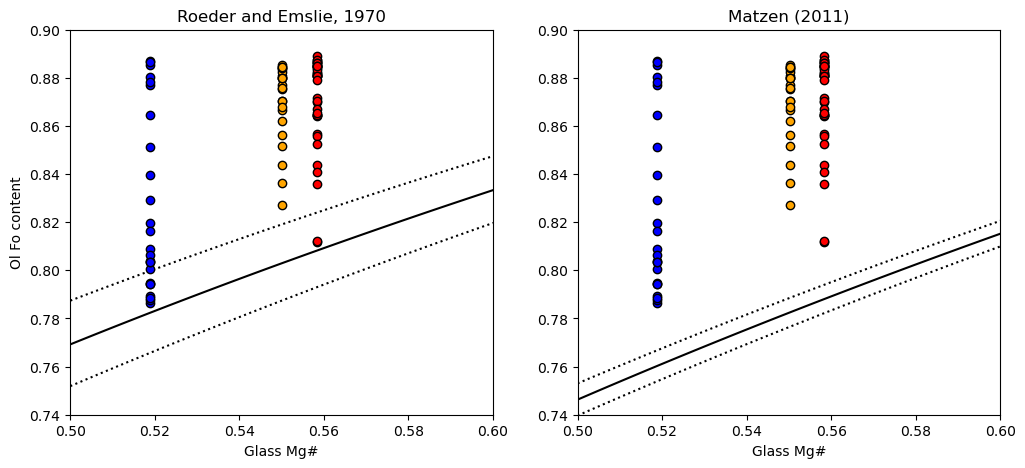

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data

ax1.plot(Ol_Fo_Calc.loc[MIs_LL4_index]*0+Liq_Mgno_calc_mean_LL4,
         Ol_Fo_Calc.loc[MIs_LL4_index], 'ok', mfc='blue')

ax1.plot(Ol_Fo_Calc.loc[MIs_LL7_index]*0+Liq_Mgno_calc_mean_LL7,
         Ol_Fo_Calc.loc[MIs_LL7_index], 'ok', mfc='orange')

ax1.plot(Ol_Fo_Calc.loc[MIs_LL8_index]*0+Liq_Mgno_calc_mean_LL8,
         Ol_Fo_Calc.loc[MIs_LL8_index], 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(Ol_Fo_Calc.loc[MIs_LL4_index]*0+Liq_Mgno_calc_mean_LL4,
         Ol_Fo_Calc.loc[MIs_LL4_index], 'ok', mfc='blue')

ax2.plot(Ol_Fo_Calc.loc[MIs_LL7_index]*0+Liq_Mgno_calc_mean_LL7,
         Ol_Fo_Calc.loc[MIs_LL7_index], 'ok', mfc='orange')

ax2.plot(Ol_Fo_Calc.loc[MIs_LL8_index]*0+Liq_Mgno_calc_mean_LL8,
         Ol_Fo_Calc.loc[MIs_LL8_index], 'ok', mfc='red')
ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Glass Mg#')
ax2.set_xlabel('Glass Mg#')
ax1.set_ylim([0.74, 0.9])
ax2.set_ylim([0.74, 0.9])
ax1.set_xlim([0.5, 0.6])
ax2.set_xlim([0.5, 0.6])

- We can see that a lot of the olivines are way to primitive to be in equilibrium with the co-erupted liquid, regardless of what Kd model we use. This is the first sign that the olivines have undergone extensive post-entrapment cooling and crystallization. 

## Workflow 2: Assess if the olivines and their melt inclusions are in equilibrium
 - If post entrapment crystallization occurs, then the crystals erupt immediatly, the melt inclusion and host olivine will be out of Mg-Fe equilibirum.
-However, as Danysuhevsky et al. show in a series of papers if sufficient time passes between the cooling event driving PEC and eruption, Fe-Mg will re-equilbrate, Fe will be lost from the inclusion, and the melt inclusion will re-approach equilibrium with its host olivine

## 1. Calculate melt inclusion Mg#

In [11]:
MI_Mgno_calc=pt.calculate_liq_mgno(liq_comps=MIs_Liq, Fe3Fet_Liq=0.15)

## 2. Plot on a rhodes diagram

(0.5, 0.7)

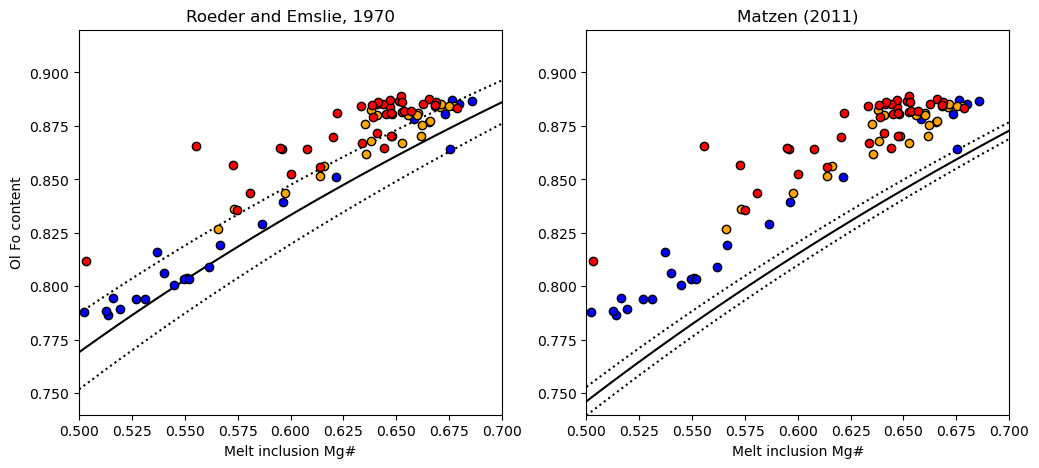

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Plotting for Roeder and Emslie
ax1.set_title('Roeder and Emslie, 1970')
# Plotting equilibrium lines
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.27)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.33)'], ':k')
ax1.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Roeder (Kd=0.3)'], '-k')

# Plotting data
ax1.plot(MI_Mgno_calc.loc[MIs_LL4_index], Ol_Fo_Calc.loc[MIs_LL4_index], 'ok', mfc='blue')
ax1.plot(MI_Mgno_calc.loc[MIs_LL7_index], Ol_Fo_Calc.loc[MIs_LL7_index], 'ok', mfc='orange')
ax1.plot(MI_Mgno_calc.loc[MIs_LL8_index], Ol_Fo_Calc.loc[MIs_LL8_index], 'ok', mfc='red')

ax2.set_title('Matzen (2011)')
# Plotting equilibrium lines
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.328)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.352)'], ':k')
ax2.plot(Rhodes['Mg#_Liq'], Rhodes['Eq_Ol_Fo_Matzen (Kd=0.34)'], '-k')
# Plotting data
ax2.plot(MI_Mgno_calc.loc[MIs_LL4_index], Ol_Fo_Calc.loc[MIs_LL4_index], 'ok', mfc='blue')
ax2.plot(MI_Mgno_calc.loc[MIs_LL7_index], Ol_Fo_Calc.loc[MIs_LL7_index], 'ok', mfc='orange')
ax2.plot(MI_Mgno_calc.loc[MIs_LL8_index], Ol_Fo_Calc.loc[MIs_LL8_index], 'ok', mfc='red')

ax1.set_ylabel('Ol Fo content')
ax1.set_xlabel('Melt inclusion Mg#')
ax2.set_xlabel('Melt inclusion Mg#')
ax1.set_ylim([0.74, 0.92])
ax2.set_ylim([0.74, 0.92])
ax1.set_xlim([0.5, 0.7])
ax2.set_xlim([0.5, 0.7])

- We can see using the Roeder and Emslie model, the melt inclusions are perfectly in line with the equilibrium field. Combined with the extensive olivine-matrix glass Fe-Mg disequilibrium, this shows extensive PEC, followed by diffusive re-equilibration

- Another line of evidence comes from plotting matrix glass and melt inclusoins in MgO-FeO space, its clear MI have lost abundant Fe

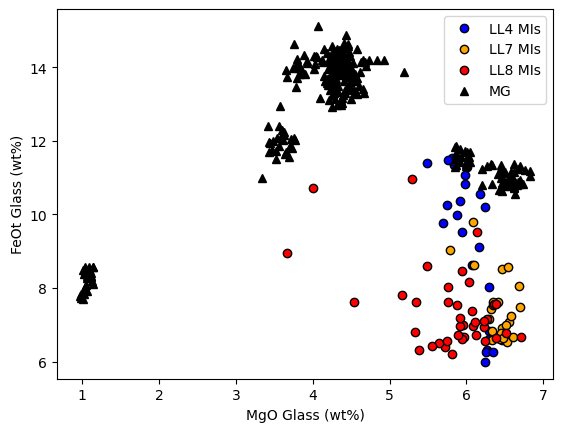

In [13]:
plt.plot(MIs_Liq['MgO_Liq'].loc[MIs_LL4_index], MIs_Liq['FeOt_Liq'].loc[MIs_LL4_index],
         'ok', mfc='blue', label='LL4 MIs')
plt.plot(MIs_Liq['MgO_Liq'].loc[MIs_LL7_index], MIs_Liq['FeOt_Liq'].loc[MIs_LL7_index],
         'ok', mfc='orange', label='LL7 MIs')
plt.plot(MIs_Liq['MgO_Liq'].loc[MIs_LL8_index], MIs_Liq['FeOt_Liq'].loc[MIs_LL8_index],
         'ok', mfc='red', label='LL8 MIs')
plt.plot(MG_Liqs['MgO_Liq'],MG_Liqs['FeOt_Liq'], '^k', mfc='k', label='MG')
plt.xlabel('MgO Glass (wt%)')
plt.ylabel('FeOt Glass (wt%)')
plt.legend()